# **Лабораторная работа №10**
**Чаплин Виталий (гр.5130901/10202)**

# Упражнение 10.1

In [17]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate, read_wave

В разделе “Акустическая характеристика” умножение ДПФ сигнала на передаточную функцию соответсвует круговой свертке, но в предположении периодичности сигнала.
В результате можно заметить, что на выходе в начале фрагмента слышна лишния нота, “затекшая” из конца этого фрагмента. Чтобы устранить эту проблему, нужно перед вычислением ДПФ добавить достаточно нулей в конец сигнала, эффекта “заворота” можно избежать

Изменим пример в chap10.ipynb и убедимся, что дополнение нулями устраняет лишнюю ноту в начале фрагмента.

Для начала рассмотрим звук выстрела, который саппроксимирует импульсную характеристику комнаты, в которой происходит выстрел.

In [18]:
if not os.path.exists('180960__kleeb__gunshot.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/180960__kleeb__gunshot.wav

In [19]:
shot = read_wave('180960__kleeb__gunshot.wav')
shot.make_audio()

Получим характеристику помещения по звуку выстрела

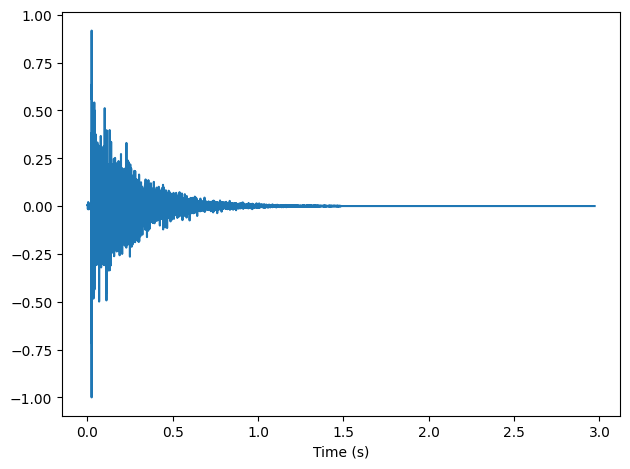

In [20]:
from thinkdsp import read_wave

response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

Найдем спектр. Это и есть отклик комнаты

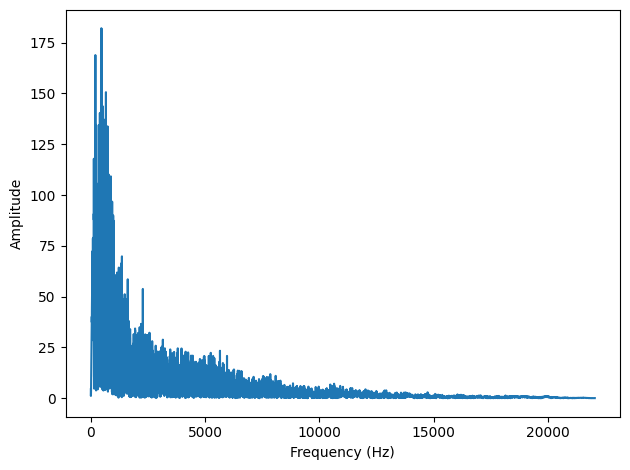

In [21]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Теперь рассмотрим звук виолончели

In [22]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

In [23]:
violin = read_wave('92002__jcveliz__violin-origional.wav')
violin.make_audio()

Можно применить условия комнаты к звуку виолончели.

Для начала обрежем до длины выстрела

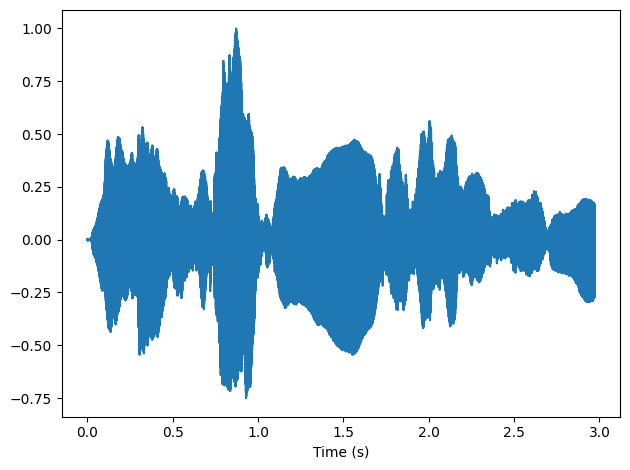

In [32]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(len(response))
violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

Найдем спектр

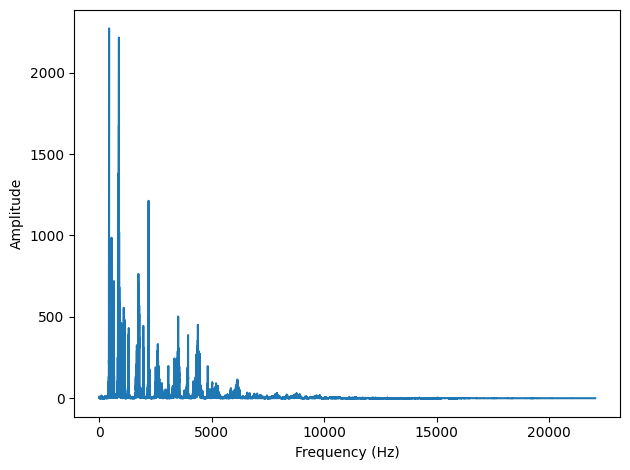

In [25]:
spectrum = violin.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Теперь мы можем умножить ДПФ сигнал на передаточную функцию и преобразовать обратно в волну:

In [26]:
output = (spectrum * transfer).make_wave()
output.normalize()

Можно увидеть, что сигнал и спектр стали другими

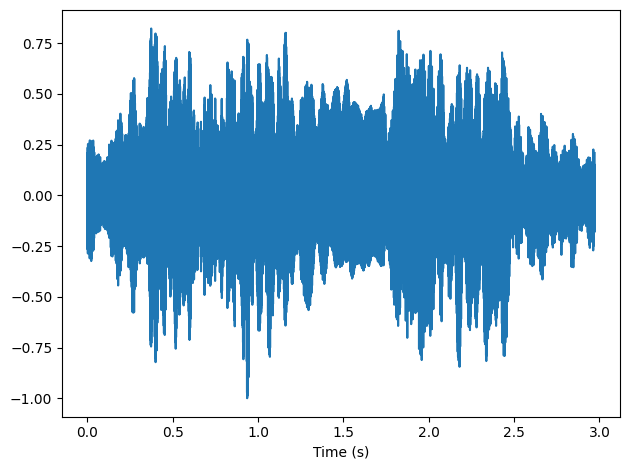

In [27]:
output.plot()
decorate(xlabel='Time (s)')

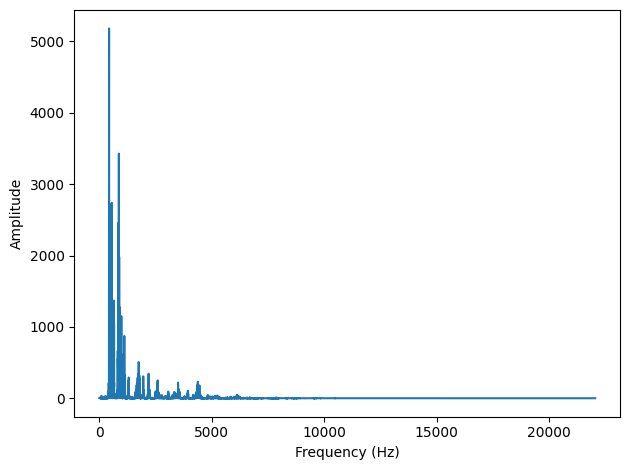

In [28]:
spectrum = output.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [29]:
output.make_audio()

В начале записи на короткий период времени слышна посторонняя нота. Связано это с тем, что умножение ДПФ сигнала на передаточную функцию эквивалентно круговой свертке, но в предположении периодичности сигнала. Наш сигнал апериодичен, так что в начало случайно попадает нота с конца фрагмента. Попробуем от нее избавиться. Сделать это можно путем добавления дополнительных нулей в конец сигнала.

Обрежем до 2^16 импульсов и расширим до 2^17 путем добавления нулей

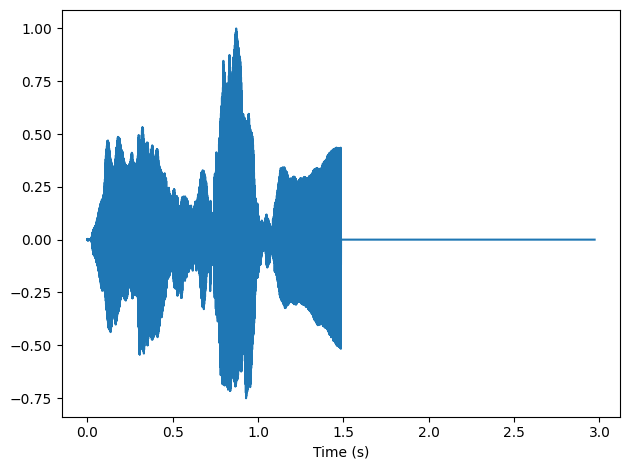

In [30]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

Выполним ДПФ

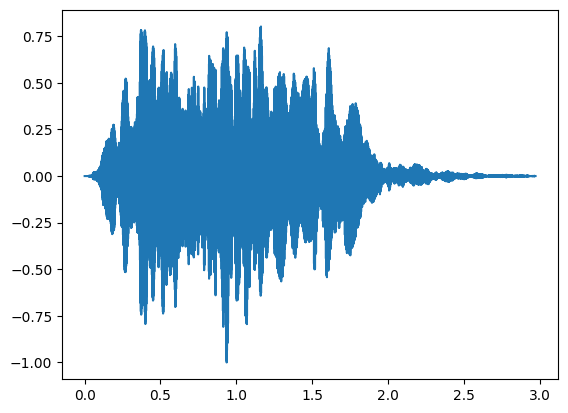

In [31]:
violin.truncate(len(response))
spectrum = violin.make_spectrum()
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()

In [33]:
output.make_audio()

# Упражнение 10.2

Возьмем звук с ресурса Open Air с импульсной характеристикой. Далее найдем запись с той же частотой дискретизации, как у импульсной характеристики. Смоделируем звучание записи в заданных условиях 2 способами: с помощью свертки с импульсной характеристикой и с помощью умножения ДПФ записи на вычисленный фильтр, соответствующий импульсной характеристике



In [34]:
if not os.path.exists('stalbans_a_mono.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/stalbans_a_mono.wav

--2024-04-22 15:45:58--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/stalbans_a_mono.wav
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/stalbans_a_mono.wav [following]
--2024-04-22 15:45:59--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/stalbans_a_mono.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793906 (775K) [audio/wav]
Saving to: ‘stalbans_a_mono.wav’

stalbans_a_mono.wav 100%[===================>] 775.30K  4.93MB/s    in 0.2s    

2024-04-22 15:45:59 (4.93 MB/s) - ‘stalbans_a_mono.wav’ saved [793906/793906]



In [35]:
response = read_wave('stalbans_a_mono.wav')
response.make_audio()

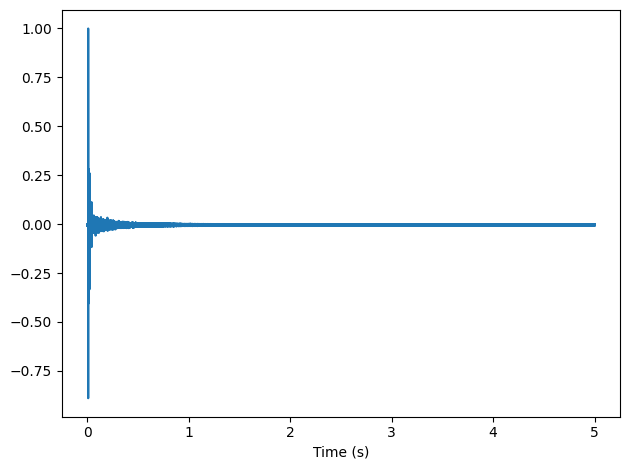

In [36]:
response = read_wave('stalbans_a_mono.wav')

start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

По аналогии с предыдущим пунктом получим передаточную функцию через ДПФ response

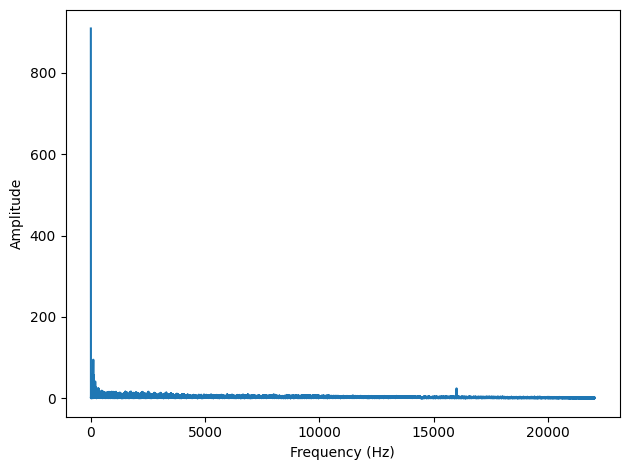

In [37]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

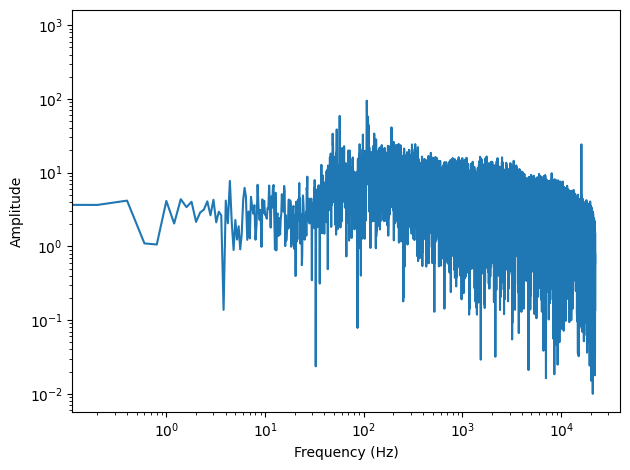

In [38]:
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude',
         xscale='log', yscale='log')

Теперь мы можем смоделировать, как звучала бы запись, если бы она была воспроизведена в той же комнате и записана тем же способом.

In [39]:
if not os.path.exists('170255__dublie__trumpet.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav

--2024-04-22 15:48:35--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/170255__dublie__trumpet.wav [following]
--2024-04-22 15:48:36--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/170255__dublie__trumpet.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1540668 (1.5M) [audio/wav]
Saving to: ‘170255__dublie__trumpet.wav’

170255__dublie__tru 100%[===================>]   1.47M  7.32MB/s    in 0.2s    

2024-04-22 15:48:37 (7.32 MB/s) - ‘170255__dublie__t

In [42]:
trumpet = read_wave('170255__dublie__trumpet.wav')
trumpet.make_audio()

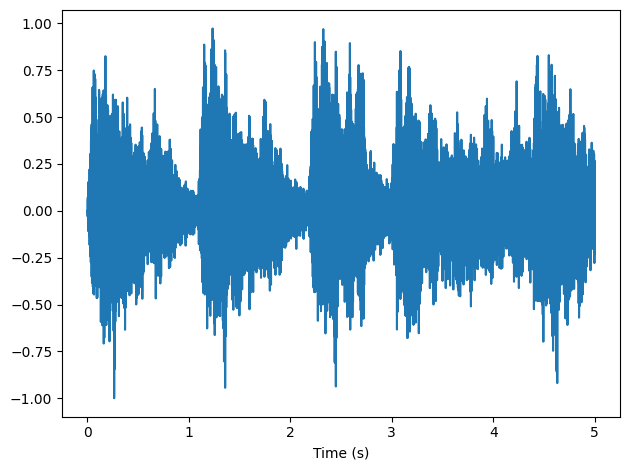

In [43]:
wave = read_wave('170255__dublie__trumpet.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

In [44]:
wave.make_audio()

Найдем спектр, наложим условия и прослушаем

In [45]:
spectrum = wave.make_spectrum()

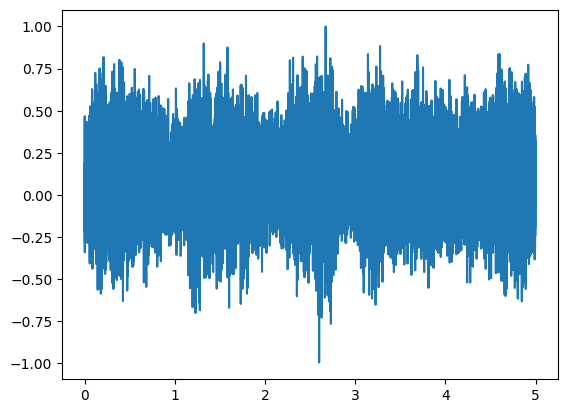

In [46]:
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()

In [47]:
output.make_audio()

Слышно сильное эхо


Теперь сделаем то же самое, но с помощью операции свертки

In [48]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()

Результат аналогичен предыдущему, только запись длинне